In [10]:
%matplotlib notebook 

# Обзор данных по недвижимости

Примечание: весь анализ проведен 27.07.2023. В случае изменения данных неоходимо будет анализировать результаты <b>заново</b>

In [2]:
import pandas as pd

houses_data_RAW = pd.read_csv("houses-data.csv", index_col=[0])
print(houses_data_RAW)

         price  area_house  area_land                                   type  \
0     20000000       190.0        5.0  индивидуальное жилищное строительство   
1      5550000       160.0        6.0  индивидуальное жилищное строительство   
2      4450000        57.0       11.0                            садоводство   
3      6490000       110.0        6.0                            садоводство   
4     28900000       279.0        3.0  индивидуальное жилищное строительство   
...        ...         ...        ...                                    ...   
6191   2600000        40.0        6.0  индивидуальное жилищное строительство   
6192   6900000        60.0        9.0  индивидуальное жилищное строительство   
6193   2600000        40.0        6.0  индивидуальное жилищное строительство   
6194   6900000        60.0        9.0  индивидуальное жилищное строительство   
6195    560000        34.0       14.0  индивидуальное жилищное строительство   

     house_material  num_of_floors  
0 

## Обзор цен 

In [3]:
pd.options.display.float_format = '{:.0f}'.format
print(houses_data_RAW["price"].describe())

count        6196
mean      5896737
std       8188772
min        100000
25%       1450000
50%       3950000
75%       7257500
max     188000000
Name: price, dtype: float64


### Вывод к обзору цен: 
<ol>
    <li>Максимальная цена за недвижимость достигает <b>188.000.000 рублей</b>;</li>
    <li>Средняя цена за недвижимость достигает <b>5.896.737 рублей</b>;</li>
    <li>Минимальная цена за недвижимость достигает <b>100.000 рублей</b>;</li>
</ol>

## Обзор площадей домов

In [4]:
pd.options.display.float_format = '{:.2f}'.format
print(houses_data_RAW["area_house"].describe())

count   6196.00
mean     113.58
std      104.09
min       10.00
25%       45.00
50%       84.00
75%      140.00
max      966.00
Name: area_house, dtype: float64


### Итоги обзора площадей домов: 
<ol>
    <li>Максимальная площадь дома составляет <b>966.00 м2</b>;</li>
    <li>Средняя площадь дома составляет <b>113.58 м2</b>;</li>
    <li>Минимальная площадь дома составляет <b>10.00 м2</b>;</li>
</ol>

## Обзор площадей участков

In [5]:
pd.options.display.float_format = '{:.2f}'.format
print(houses_data_RAW["area_land"].describe())

count    6196.00
mean       34.81
std       365.33
min         1.00
25%         7.00
50%        10.00
75%        15.00
max     25000.00
Name: area_land, dtype: float64


### Вывод к обзору площадей участков: 
<ol>
    <li>Максимальная площадь участка составляет <b>25.000 сот.</b>;</li>
    <li>Средняя площадь участка составляет <b>34.81 сот.</b>;</li>
    <li>Минимальная площадь участка составляет <b>1.00 сот.</b>;</li>
</ol>

## Обзор типов домов

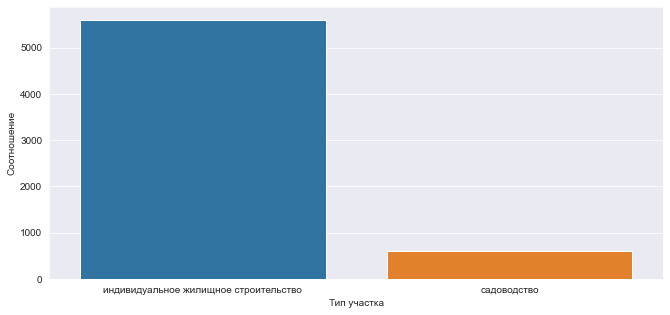

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

houses_type_df = houses_data_RAW["type"]
type_counts = houses_type_df.value_counts()

sns.set_style("darkgrid")

plt.figure(figsize=(11,5))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.xlabel("Тип участка")
plt.ylabel("Соотношение")
plt.savefig("графики/типы-участков")

### Вывод к обзору типов участков: 
<ol>
    <li>Самый распространенный тип участка - <b>Индивидуальное жилищное строительство</b> - свыше 5000 построек;</li>
    <li>Самый непопулярный тип участка - оформленный как <b>садоводство</b> - менее 1000 построек;</li>
</ol>

## Обзор материалов домов

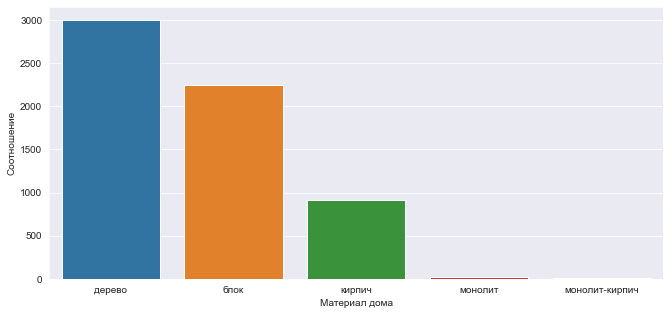

In [7]:
houses_type_df = houses_data_RAW["house_material"]
type_counts = houses_type_df.value_counts()

plt.figure(figsize=(11,5))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.xlabel("Материал дома")
plt.ylabel("Соотношение")
plt.savefig("графики/материалы-домов")

### Вывод к обзору материалов домов: 
<ol>
    <li>Самый распространенный материал при строительстве - <b>Дерево</b> - 3000 построек;</li>
    <li>Второй по распостраненности материал при строительстве - <b>блок</b> - более 2000 построек;</li>
    <li>Третий по распостраненности материал при строительстве - <b>кирпич</b> - более 900 построек;</li>
    <li>Самые непопулярные материалы при строительстве - <b>монолит</b> и <b>монолит-кирпич</b> - менее 50 построек;</li>
</ol>

## Анализ зависимостей

### Построены такие графики:
<ol>
    <li>Частота площадей домов;</li>
    <li>Частота площадей участков;</li>
</ol>

#### № 1: Частота площадей домов

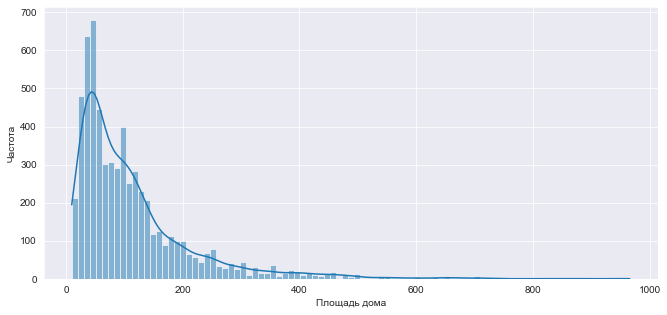

In [8]:
plt.figure(figsize=(11,5))
sns.histplot(houses_data_RAW["area_house"], kde=True)
plt.xlabel("Площадь дома")
plt.ylabel("Частота")
plt.savefig("графики/частота-площадей-домов")

##### Вывод к №1
Как видно из графика - наиболее часто встречаются дома с площадью менее 200 м2

#### № 1: Частота площадей участков

<IPython.core.display.Javascript object>


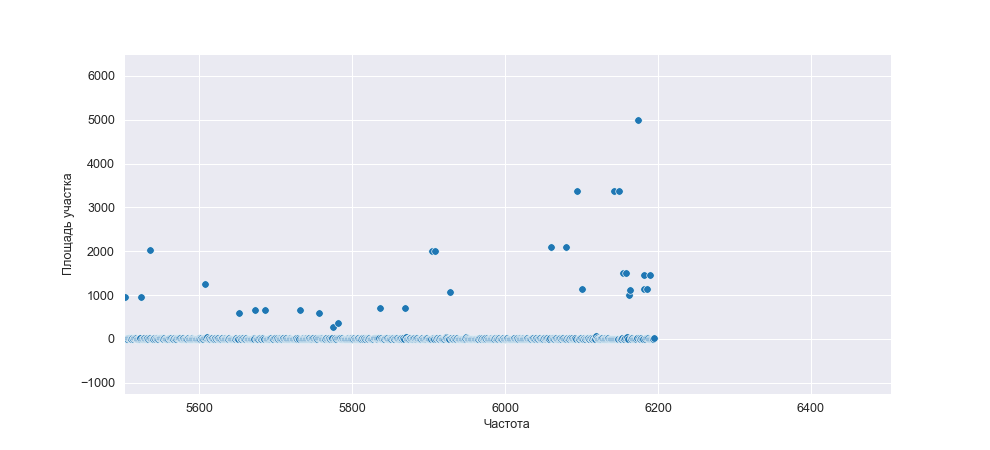

In [11]:
plt.figure(figsize=(11,5))
sns.scatterplot(houses_data_RAW["area_land"])
plt.xlabel("Частота")
plt.ylabel("Площадь участка")
plt.savefig("графики/частота-площадей-участков")

##### Вывод к №2
Как видно из графика - наиболее часто встречаются участки с площадью менее 200 м2